In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import datetime as dt
#imports downloader
##from getCitiBikeCSV import getCitiBikeCSV

%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json

Populating the interactive namespace from numpy and matplotlib


### Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [2]:
def getCitiBikeCSV(datestring):
    import os
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201502'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [5]:
# df is the dataframe where the content of the csv file is stored
df['date']= pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [7]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')


### SPLIT BY CATEGORY

I am splitting data by the time the bkers ride the bike:

##### H0: The count of bikers who ride the bike in day time is no different than the count at night time.
$$ \alpha = 0.05 $$



In [6]:
# separate the string part that indicate hours
time = lambda hour:1 if int(hour.split()[1].split(':')[0]) >6 & int(hour.split()[1].split(':')[0])<18 else 0
#daynight = lambda s:int(s[-9:-6])

# create two columns to make categories
df['time'] = df.starttime.apply(time)
#df['daynight'] = df.starttime.apply(daynight)
#df['daynight'].tail()
    

In [17]:
df['dayduration'] = df['tripduration'][(df['time'] == 1)]


In [22]:
df['nduration'] = df['tripduration'][(df['time'] == 0)]

In [23]:
#dropping NaN values
#df['dayduration'].dropna(inplace= True)
#df['nightduration'].dropna(inplace= True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,time,dayduration,nduration
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,0,NaN,801.0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,0,NaN,379.0
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,0,NaN,2474.0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,0,NaN,818.0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,0,NaN,544.0


In [21]:
df.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,hour,time,dayduration,nightduration
count,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,196930.000000,194663.000000,196930.000000,196930.000000,196930.000000,147775.000000,0.0
mean,649.383207,438.669949,40.735784,-73.990074,438.540695,40.735530,-73.990391,18120.012278,1975.288031,1.156203,13.825613,13.825613,652.410902,NaN
std,873.231710,321.320871,0.018569,0.011522,321.595789,0.018480,0.011508,2074.916613,11.734009,0.393946,4.860963,4.860963,834.214792,NaN
min,60.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,14530.000000,1899.000000,0.000000,0.000000,0.000000,60.000000,NaN
25%,340.000000,307.000000,40.723684,-73.997901,307.000000,40.723627,-73.998102,16338.000000,NaN,1.000000,10.000000,10.000000,NaN,NaN
50%,507.000000,417.000000,40.737815,-73.990093,415.000000,40.737262,-73.990697,18089.000000,NaN,1.000000,15.000000,15.000000,NaN,NaN
75%,764.000000,491.000000,40.750380,-73.981854,491.000000,40.750200,-73.981923,19886.000000,NaN,1.000000,18.000000,18.000000,NaN,NaN
max,43016.000000,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21703.000000,1999.000000,2.000000,23.000000,23.000000,43016.000000,NaN


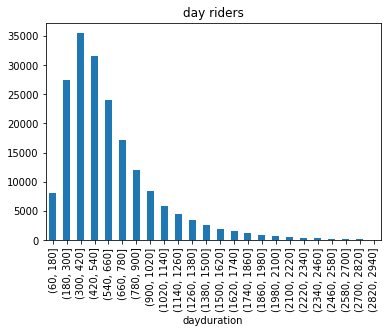

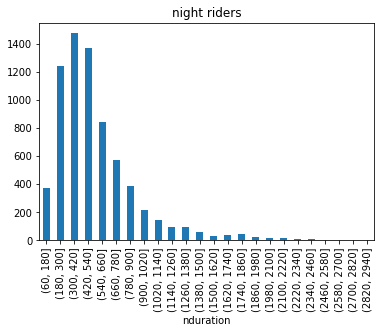

In [25]:

# plotting histograms with pandas is a bit different than with pylab
# this is a VERY USEFUL syntaxfor you to knonw!
bins = np.arange(60, 3000, 120)
axD = df.dayduration.groupby(pd.cut(df.dayduration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
axD.set_title("day riders")
axN = df.nduration.groupby(pd.cut(df.nduration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                                legend=False)
axN.set_title("night riders");

              count_nonzero
dayduration                
(60, 180]          0.009802
(180, 300]         0.040495
(300, 420]         0.061853
(420, 540]         0.089498
(540, 660]         0.081238
(660, 780]         0.071370
(780, 900]         0.062178
(900, 1020]        0.047760
(1020, 1140]       0.037129
(1140, 1260]       0.027093
(1260, 1380]       0.022725
(1380, 1500]       0.017242
(1500, 1620]       0.011462
(1620, 1740]       0.008656
(1740, 1860]       0.008228
(1860, 1980]       0.006382
(1980, 2100]       0.005074
(2100, 2220]       0.003711
(2220, 2340]       0.002613
(2340, 2460]       0.001685
(2460, 2580]       0.000946
(2580, 2700]       0.000555
(2700, 2820]       0.000350
(2820, 2940]       0.000000


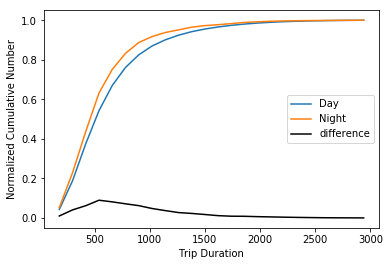

In [27]:


csDay=df.dayduration.groupby(pd.cut(df.dayduration, bins)).agg([count_nonzero]).cumsum()

csNight=df.nduration.groupby(pd.cut(df.nduration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(csDay / csDay.max()-csNight / csNight.max()))

pl.plot(bins[:-1] + 120, csDay / csDay.max(), label = "Day")
pl.plot(bins[:-1] + 120, csNight / csNight.max(), label = "Night")
pl.plot(bins[:-1] + 120, np.sqrt(csNight / csNight.max() - csDay / csDay.max())**2, 'k-',
        label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

In [28]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

## KS tests to compare 2 samples

In [29]:

ks = scipy.stats.ks_2samp(df.dayduration, df.nduration)
print (ks)

Ks_2sampResult(statistic=0.92813690143705885, pvalue=0.0)


As the p-value we calculated is very small, we can reject the null hypothesis.

The scipy.stats KS test already tells me the significance and the p-value.

The next few cells are here just to show you how you would obtain the same result by hand, but they are not required.

Remember: the Null hypothesis is rejected if

$D_KS(n1,n2) &gt; c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$

(see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!!

http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/

But also this result depends in your choice of binning through, and thustheresultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

### Now retest using a test for correlation.¶

That will answer a slightly different question though - formulate the NULL appropriately. The tests for correlations (generally) requires the variable to be paired, so that I can tell if x changes does y change similarly. But the datasets are of different size! You will need to reduce them to the same size. You can do that by subsampling of the data: take only 1 ride every of 200, which you can achieve "slicing and broadcasting" the array or using one of the python function (built in python numpy.random.choice() functions for example: Docstring: choice(a, size=None, replace=True, p=None)
Generates a random sample from a given 1-D array
    .. versionadded:: 1.7.0

Parameters ...
But make sure you understand how to use it! there is an option "replace" which you should think about.

##### H0: The correlation between day and night riders is most likely null

In [32]:
datFrame=df[df.index % 100 == 0]
datFrame.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,time,dayduration,nduration
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,0,NaN,801.0
100,164,2/1/2015 1:15,2/1/2015 1:17,345,W 13 St & 6 Ave,40.736494,-73.997044,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,19040,Subscriber,1990.0,1,2015-02-01 01:15:00,1,164.0,NaN
200,241,2/1/2015 3:57,2/1/2015 4:01,252,MacDougal St & Washington Sq,40.732264,-73.998522,128,MacDougal St & Prince St,40.727103,-74.002971,15290,Subscriber,1982.0,1,2015-02-01 03:57:00,1,241.0,NaN
300,551,2/1/2015 7:55,2/1/2015 8:05,521,8 Ave & W 31 St,40.750450,-73.994811,435,W 21 St & 6 Ave,40.741740,-73.994156,19067,Subscriber,1974.0,1,2015-02-01 07:55:00,1,551.0,NaN
400,573,2/1/2015 8:42,2/1/2015 8:51,150,E 2 St & Avenue C,40.720874,-73.980858,285,Broadway & E 14 St,40.734546,-73.990741,14947,Subscriber,1981.0,2,2015-02-01 08:42:00,1,573.0,NaN


In [33]:
X=datFrame.dayduration
Y=datFrame.nduration

Ppearson=scipy.stats.pearsonr(X,Y)
print(Ppearson)

(nan, 1.0)


This shows there is no correlation between the day and night bikers


### Spearman's test

In [34]:
Pspear=scipy.stats.spearmanr(X, Y)
print(Pspear)

SpearmanrResult(correlation=-0.099839258479842041, pvalue=9.0118961052270317e-06)


This test gives us the negative correlation between the two variables. But as the p-value is very low, we cannot reject the null hypothesis.

# Part-2 

In [38]:
datestring = '201503'
getCitiBikeCSV(datestring)

file in place, you can continue


In [39]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,669,3/1/2015 0:00,3/1/2015 0:11,164,E 47 St & 2 Ave,40.753231,-73.970325,477,W 41 St & 8 Ave,40.756405,-73.990026,21409,Subscriber,1987.0,1
1,750,3/1/2015 0:01,3/1/2015 0:14,258,DeKalb Ave & Vanderbilt Ave,40.689407,-73.968855,436,Hancock St & Bedford Ave,40.682166,-73.953990,19397,Subscriber,1968.0,1
2,663,3/1/2015 0:01,3/1/2015 0:12,497,E 17 St & Broadway,40.737050,-73.990093,477,W 41 St & 8 Ave,40.756405,-73.990026,20998,Customer,NaN,0
3,480,3/1/2015 0:02,3/1/2015 0:10,470,W 20 St & 8 Ave,40.743453,-74.000040,491,E 24 St & Park Ave S,40.740964,-73.986022,21565,Subscriber,1983.0,1
4,1258,3/1/2015 0:02,3/1/2015 0:23,345,W 13 St & 6 Ave,40.736494,-73.997044,473,Rivington St & Chrystie St,40.721101,-73.991925,14693,Subscriber,1970.0,1


In [40]:
dFull=pd.concat([df1,df2])

dFull.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


##### Null Hypothesis 

$H_0$: The difference between the age of Manhattan and Brooklyn bikers is null

$\alpha$ = 0.05

In [42]:
def borough(coordinate):
    lat, long = coordinate
    if (lat <= 40.698215) and (long >= -73.970755):
        return 1
    else:
        return 0
    
dFull['Borough'] = dFull[['start station latitude', 'start station longitude']].apply(borough, axis=1)
dFull.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Borough
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,0
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,0


In [43]:
dFull.describe()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,Borough
count,5.387560e+05,538756.000000,538756.000000,538756.000000,538756.000000,538756.000000,538756.000000,538756.000000,523636.000000,538756.000000,538756.000000
mean,7.032712e+02,437.227350,40.735717,-73.990157,437.371511,40.735484,-73.990451,18080.648264,1975.291621,1.150101,0.013253
std,2.486018e+03,320.372061,0.018838,0.011716,321.210895,0.018774,0.011739,2081.807595,11.719812,0.429114,0.114355
min,6.000000e+01,72.000000,40.646768,-74.017134,72.000000,40.646768,-74.017134,14529.000000,1899.000000,0.000000,0.000000
25%,3.480000e+02,307.000000,40.722992,-73.998102,307.000000,40.722992,-73.998842,16309.000000,NaN,1.000000,0.000000
50%,5.260000e+02,416.000000,40.737815,-73.990093,412.000000,40.737262,-73.990617,18058.000000,NaN,1.000000,0.000000
75%,8.120000e+02,490.000000,40.750450,-73.981854,490.000000,40.750200,-73.981918,19842.000000,NaN,1.000000,0.000000
max,1.007614e+06,3002.000000,40.771522,-73.950048,3002.000000,40.771522,-73.950048,21760.000000,1999.000000,2.000000,1.000000


In [46]:
dFull.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'Borough', 'DOB'],
      dtype='object')

In [45]:
dFull['DOB']=2015- dFull['birth year']

In [47]:
dFull.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,Borough,DOB
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,0,37.0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,0,22.0
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,0,46.0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,0,30.0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,0,58.0


In [68]:
manAge = dFull.DOB[dFull["Borough"] == 1]
bklAge= dFull.DOB[dFull["Borough"] == 0]


manAge = manAge.dropna()

bklAge = bklAge.dropna()

In [69]:
MAge = np.asarray(manAge)
BAge = np.asarray(bklAge)

In [75]:
brooklyn_sample = np.random.choice(BAge, size = 6890, replace = False)

In [76]:
manhattan_array = sorted(MAge)
brooklyn_array = sorted(brooklyn_sample)

### KS Test

In [77]:
ks = scipy.stats.ks_2samp(manhattan_array, brooklyn_array)

In [78]:
print(ks)

Ks_2sampResult(statistic=0.14296081277213357, pvalue=7.7805340194311571e-62)


As the p-value is very small in this test, we can clearly reject the ull hypothesis

### Pearson's Test

In [79]:
Ppear=scipy.stats.pearsonr(manhattan_array,brooklyn_array)

In [80]:
print(Ppear)

(0.99051880155721905, 0.0)


As the correlation coefficient is very close to 1, we can say that the relationship between the rider age group in Manhattan and Brooklyn is linear. So we cannot reject our null hypothesis 

### Spearman's Test

In [85]:
Pspear=scipy.stats.spearmanr(manhattan_array,brooklyn_array)

In [86]:
print(Pspear)

SpearmanrResult(correlation=0.99885931172406206, pvalue=0.0)


In this test also, the correlation coefficient is very close to 1, so its safe to say that the relationship between the rider age group in Manhattan and Brooklyn is linear. Therefore, we cannot reject the null hypothesis